# Diwali_Online_Sales_Analysis (Data OF India) 

Questions: 
    1)Which purchasing Power Are Highest
    
    2)The states Where Sales and Orders are highest
    
    3)Which Age group will be Our target
    
    3)Which Items are most likely to sell 
    
    4)Which Depaetment People Doing More shopping
    
   

In [8]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [9]:
# import csv file
df = pd.read_csv('D:\Documents\Data set For practice\Diwali Sales Data.csv', encoding= 'unicode_escape')

In [10]:
df.shape

(11251, 15)

In [11]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [12]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN



# Data Cleaning

#

# Check the Null value and Overall Checking

In [13]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

Find Two Columns Stattus And Unnamed1 which are Full of Null Values and Amount Column has 12 Null Values 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# For Handeling Null Value

1)  When to Drop a column
The column has more then 75% Missing Values then Drop this Column
Drop The Any column which has all null values : df.drop (['col_name'], ['col_name']),axis=1,inplace=True) [Row*column so 0 - Row , 1 - Columns]
Drop missing from Whole dataset values use : df.dropna(axis=0 / axis=1) [0- Row , 1- Column]

2) When the column has Less than 30%-40% Null Value 

For fill the value with mean, median, mode or forward and background interpulation

Fill the Null value with arbitary value :(Not recomended) df.fillna( value , inplace = True)
Fill specific columns with arbitary Value df[" col name"].fillna( value , inplace=True)
For fill the value with mean value(When data has no outlier then use this, if outlier then this will be Recomended to use Median) df[" col name"].fillna( df["col name"].mean() , inplace=True)

Forward Filling Imputation : df1['Age'] = df1['Age'].ffill()

Backward Filling Imputation : df1['Age'] = df1['Age'].bfill()

#
As here the Columns Full Of null Values (DROP THE COLUMN)

#

In [15]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [16]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

# Now Handle the missing Value of Amount Column

In [17]:
df.Amount.describe()

count    11239.000000
mean      9453.610858
std       5222.355869
min        188.000000
25%       5443.000000
50%       8109.000000
75%      12675.000000
max      23952.000000
Name: Amount, dtype: float64

<Axes: >

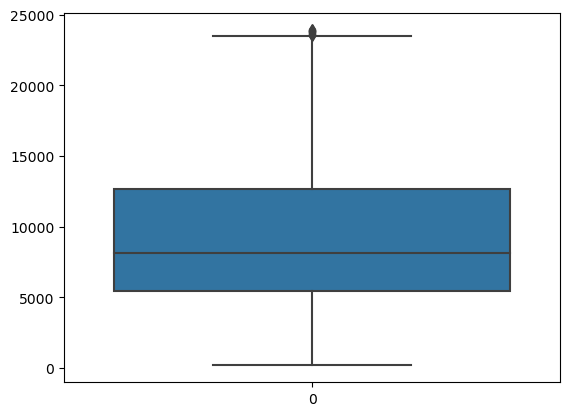

In [18]:
sns.boxplot(df.Amount)

The Boxplot Shows there is no so much Outliers in Amount Column (SO Handle this Outlier Using Mean Value : 9453.610858 )

In [69]:
df['Amount'].fillna(df.Amount.mean(),inplace=True)

In [70]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

# Handaling The duplicated Values

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

# Change data type

In [ ]:
df['Amount'] = df['Amount'].astype('int')

In [ ]:
df['Amount'].dtypes

In [ ]:
df.columns

# Numerical Columns Analysis

In [20]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11239.000000
mean,35.421207,2.489290,9453.610858
std,12.754122,1.115047,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Feature Scaling 

 Here we can done the feature if we Run some Machine Learnnig Models .But Not need to do Here .
 
1)Standarization ( Ensure the data follows Stadard Normal distribution with Mean = 0, SD = 1 ) (x-mean/SD)

2)Normalization ( (x-x min)/x max-x min) ( Ensure the data range From0 0 to 1 )

# Exploratory Data Analysis

# Univariate Analysis and Bivariate Analysis

### Gender

1) which purchasing Power Are Highest

In [64]:
a=df.Gender.value_counts()

In [22]:
df.Gender.describe()

count     11251
unique        2
top           F
freq       7842
Name: Gender, dtype: object

In [ ]:
df.groupby(df['Occupation'])

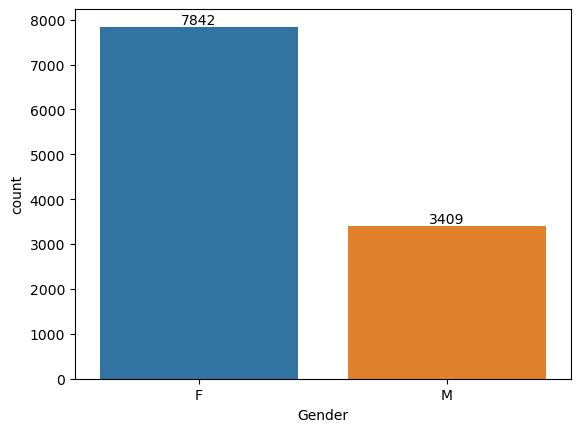

In [23]:
# plotting a bar chart for Gender and it's count
ax = sns.countplot(x = 'Gender',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
sns.

Answer 1) 
Most of the buyers are females and even the purchasing power of females are greater than men

### Age

At Which age most difference in Purchasig Power

In [58]:
df['Age Group'].unique()

array(['26-35', '0-17', '18-25', '55+', '46-50', '51-55', '36-45'],
      dtype=object)

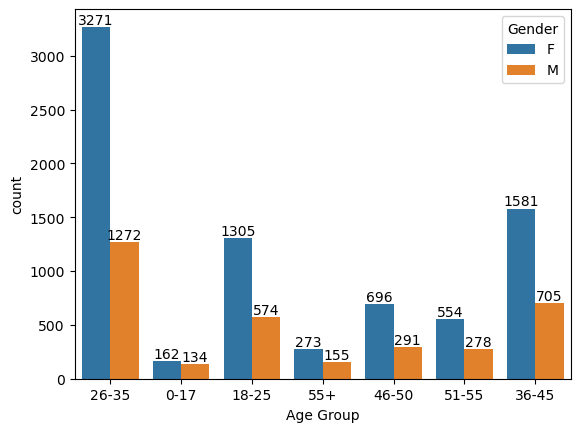

In [25]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

Answer: Under (26-35) Age group the difference of purchaching power differs mostly

Question: which Age Group will Be Our Target for Products

<Axes: xlabel='Age Group', ylabel='Amount'>

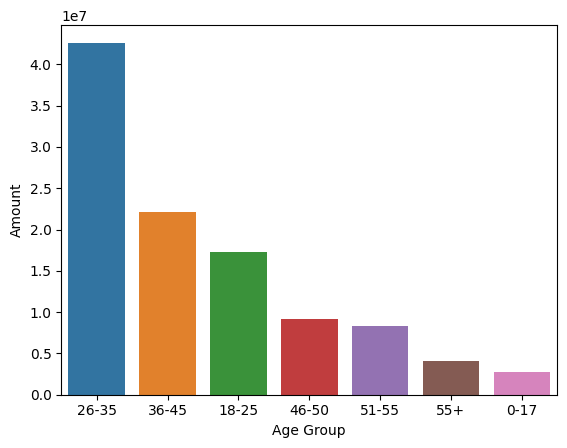

In [18]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

<Axes: xlabel='Age Group', ylabel='Amount'>

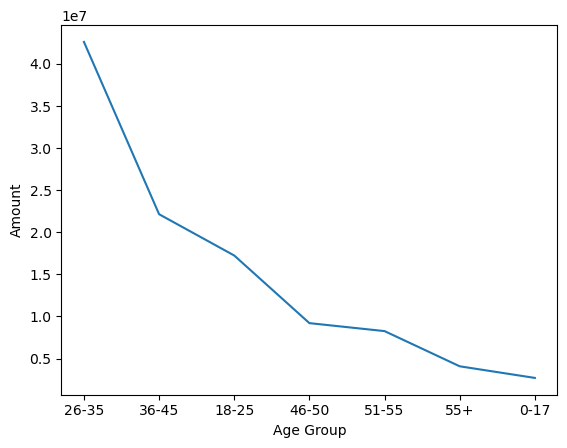

In [59]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.lineplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

(25-26) age Group will be our Target

### State

Question : Top 10 States where the orders and Sales are Highest

<Axes: xlabel='State', ylabel='Orders'>

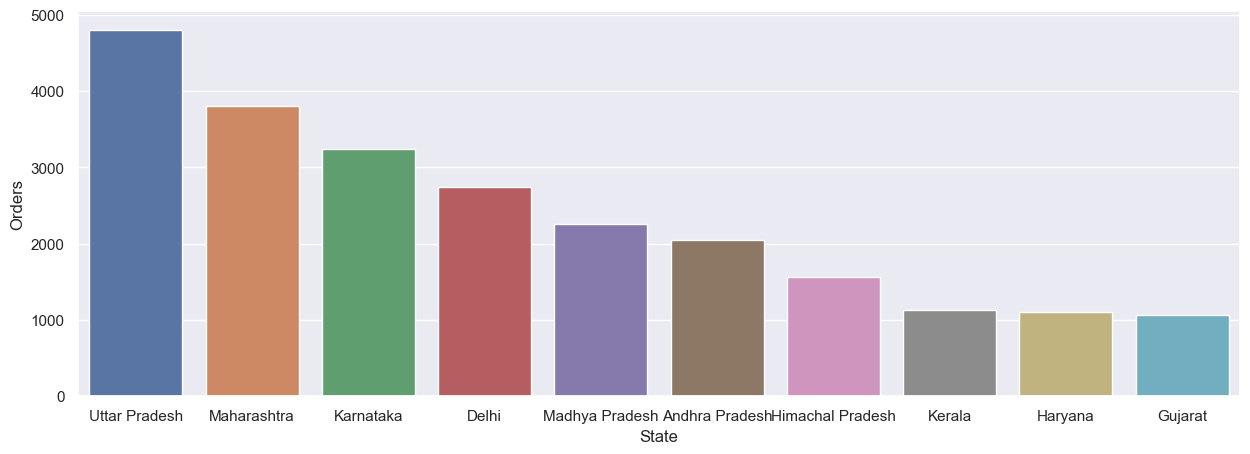

In [19]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

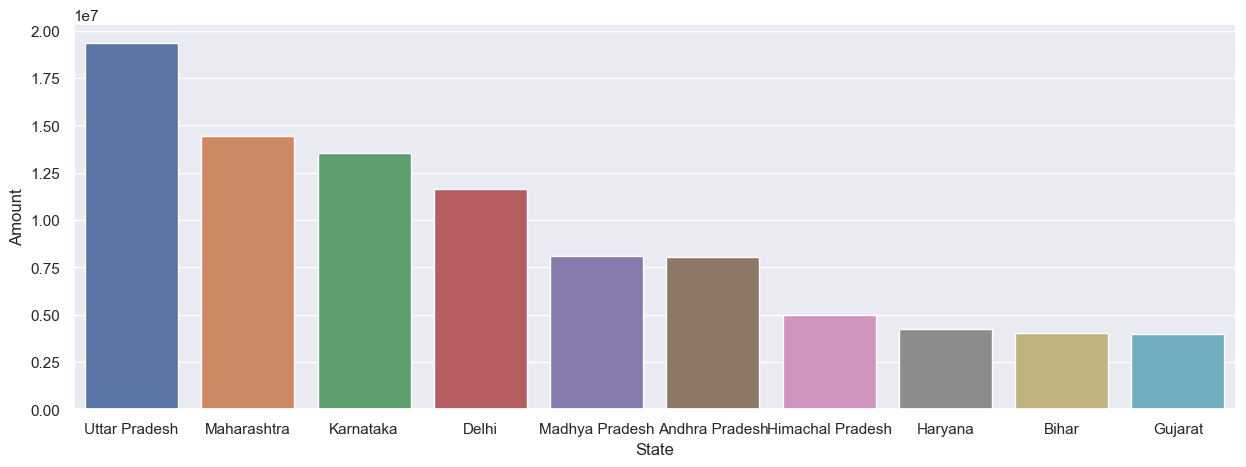

In [67]:
# total number of Sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

Orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively


### Marital Status

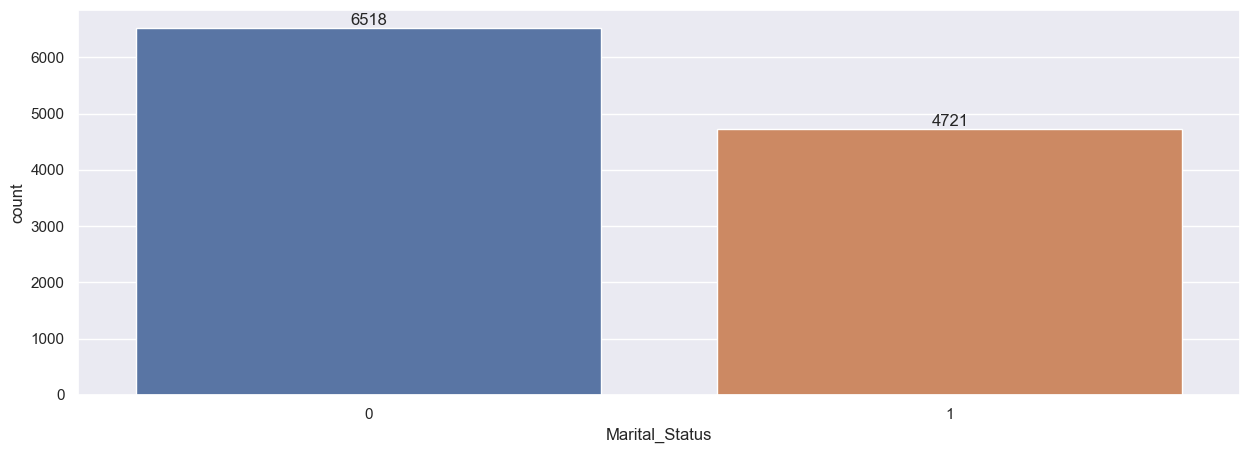

In [21]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

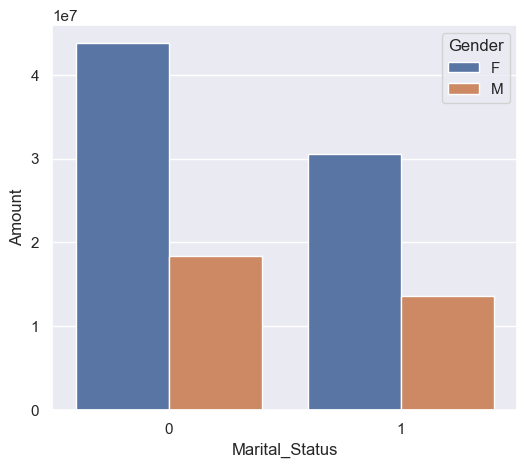

In [22]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

### Occupation

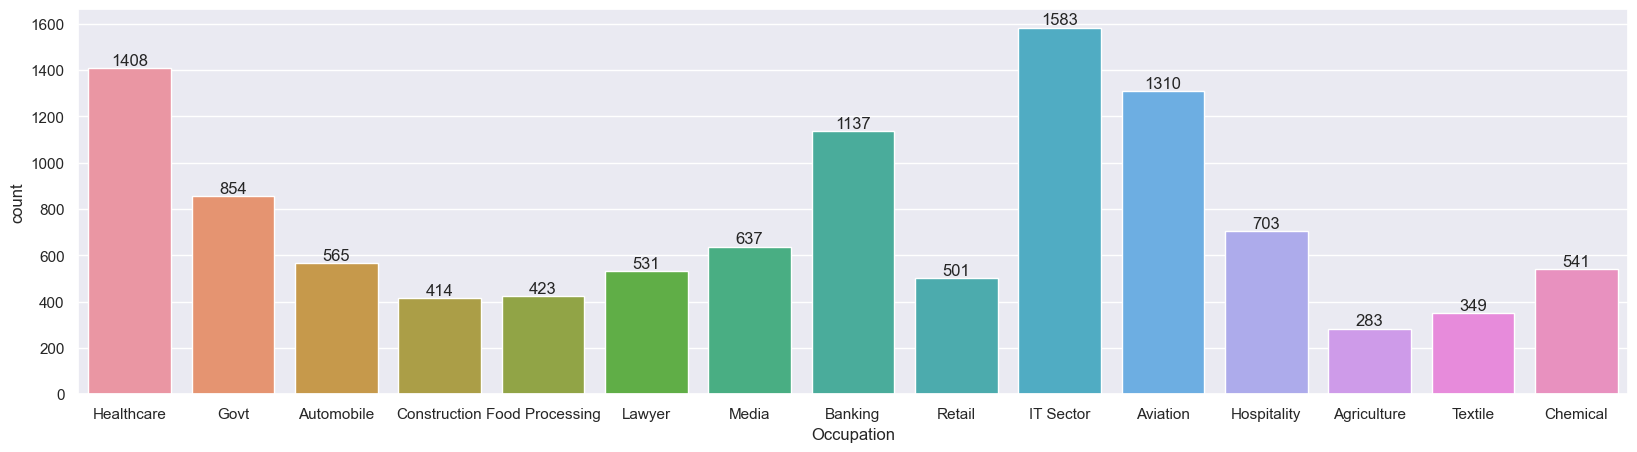

In [23]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

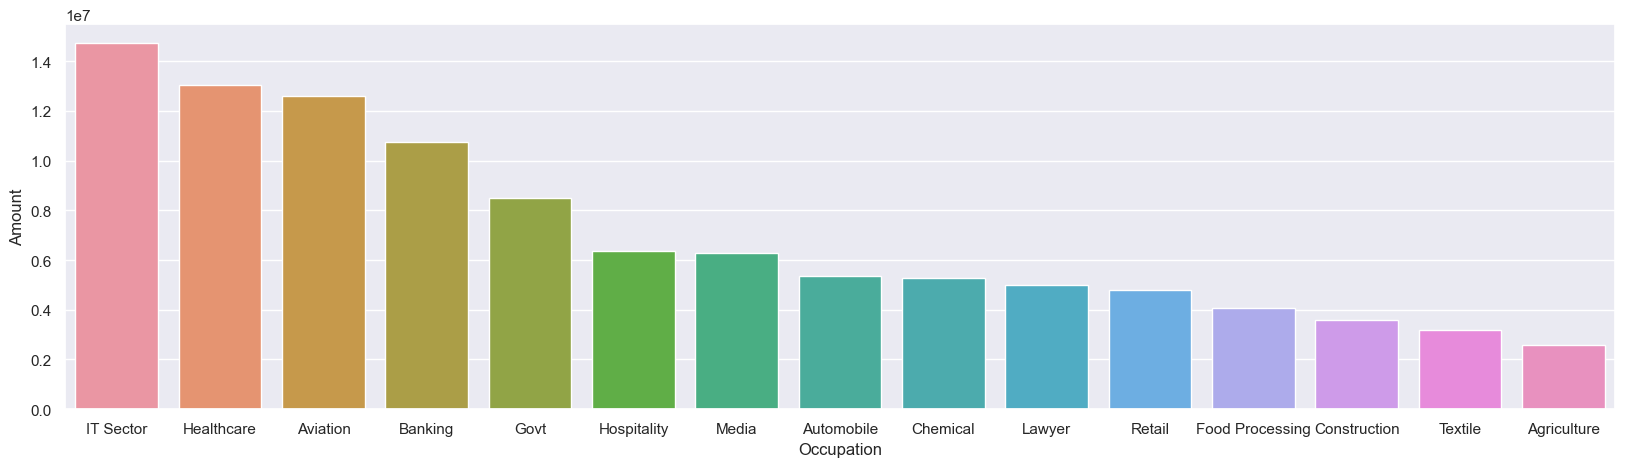

In [24]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

<Axes: ylabel='Occupation'>

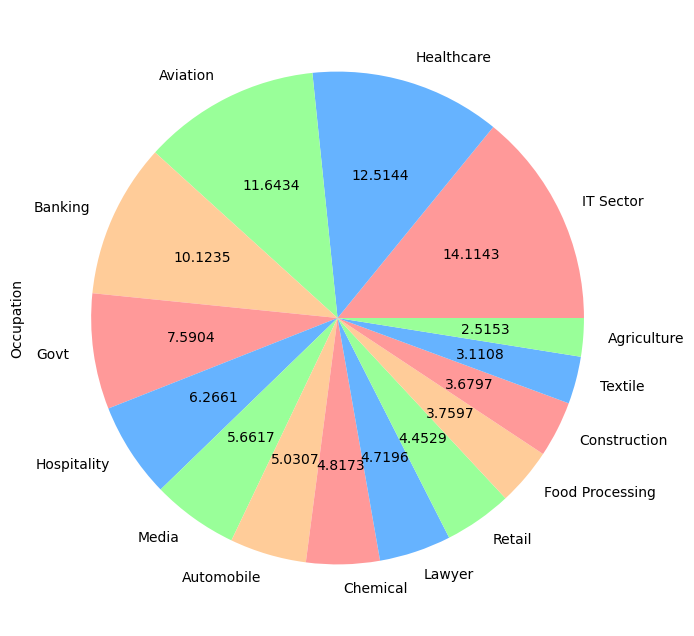

In [99]:
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
df_group=df.Occupation.value_counts()
df_group.plot.pie(figsize=(10,8), autopct="%.4f",colors = colors, )

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

### Product Category

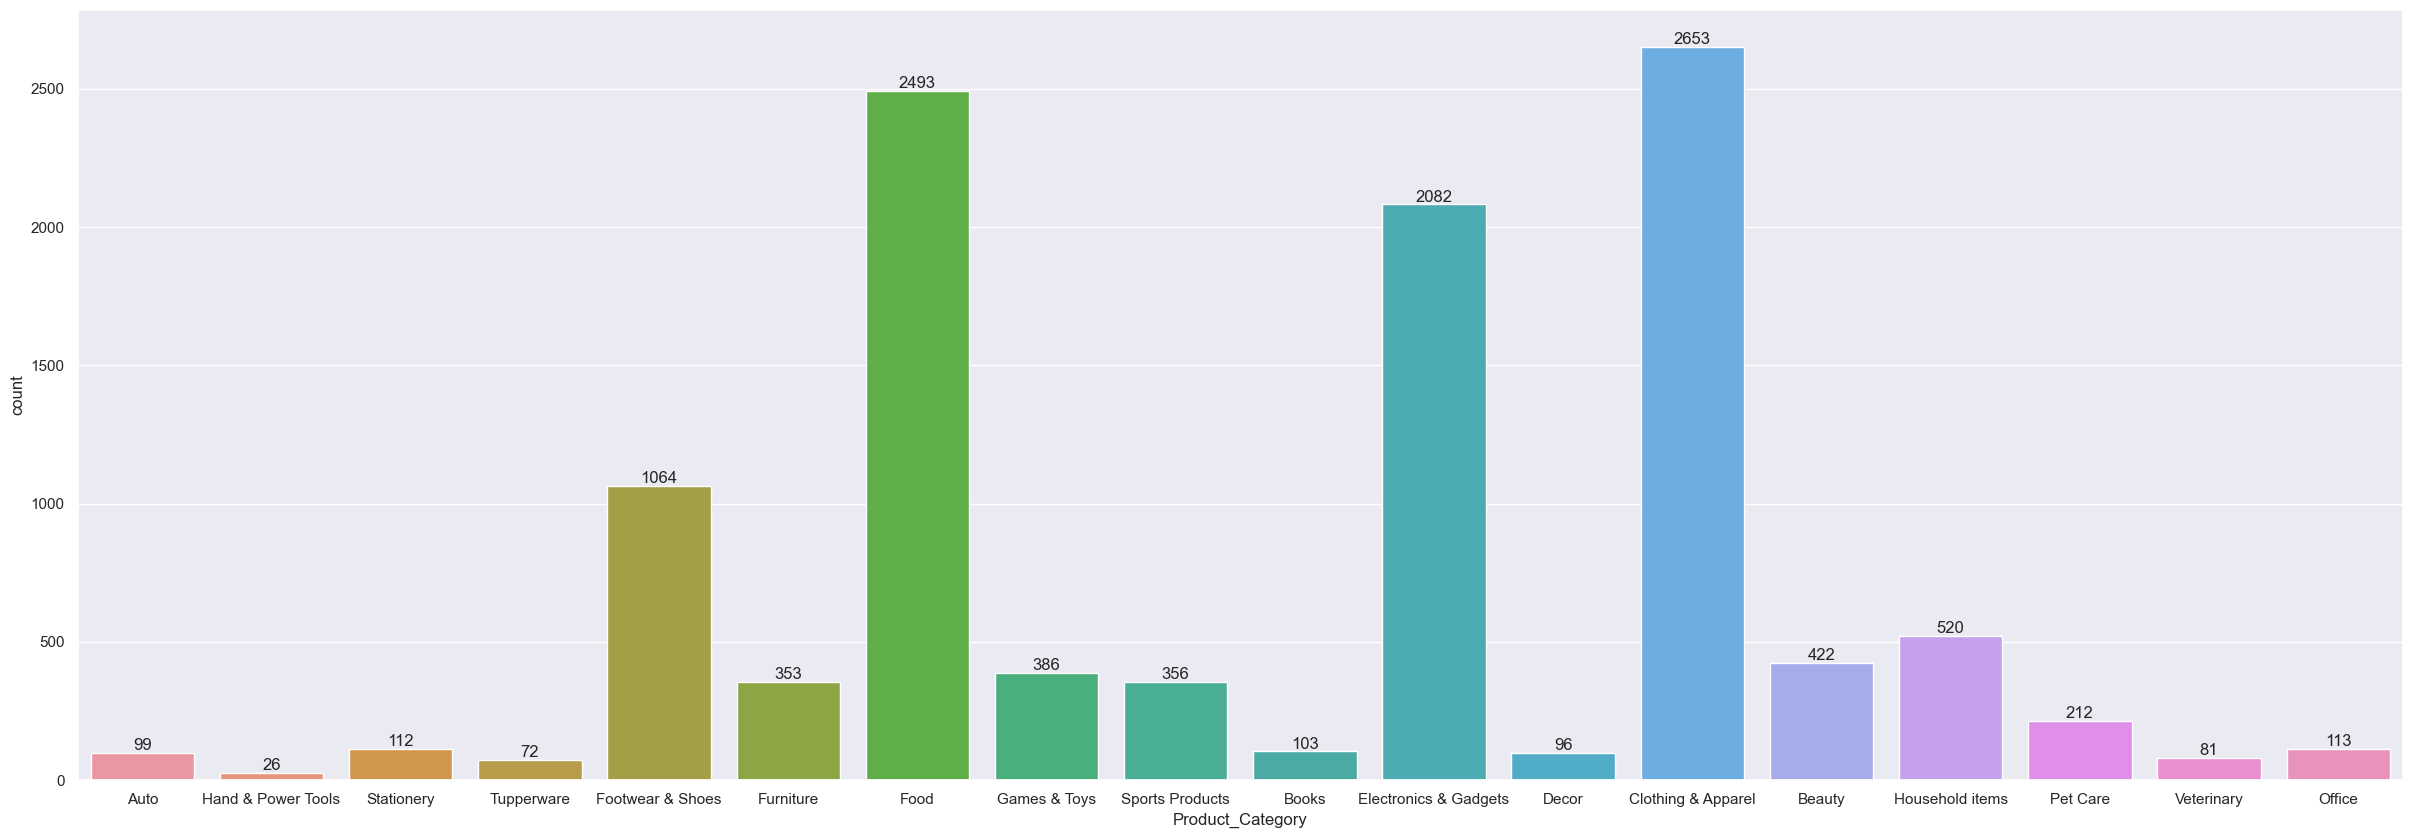

In [72]:
sns.set(rc={'figure.figsize':(30,10)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

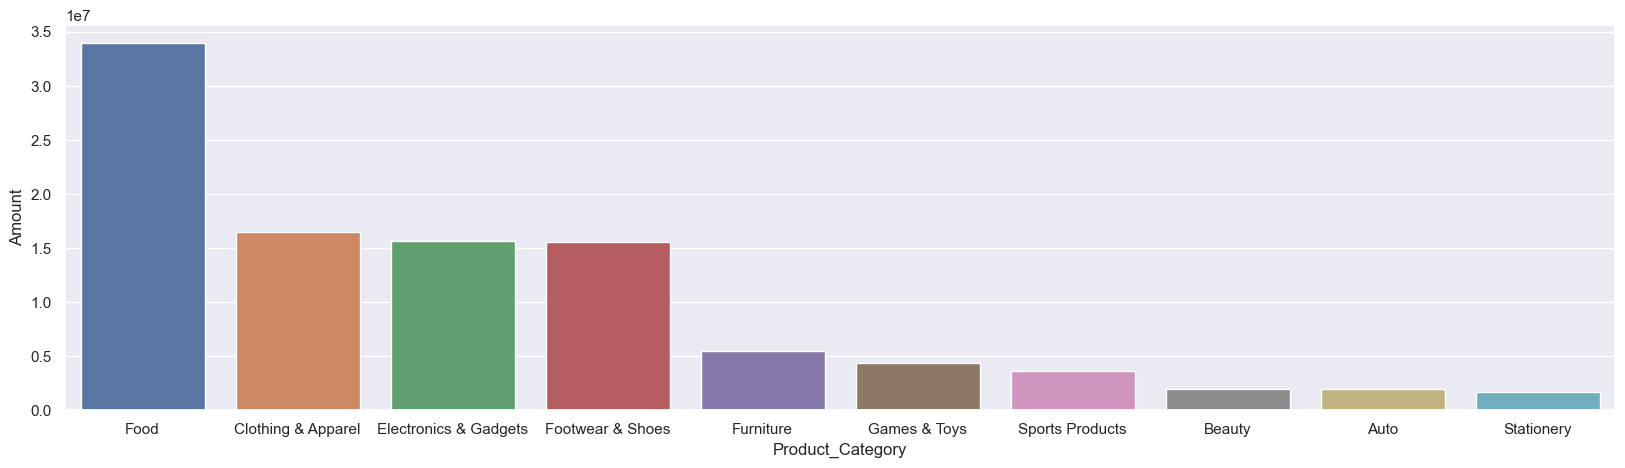

In [26]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: xlabel='Product_ID', ylabel='Orders'>

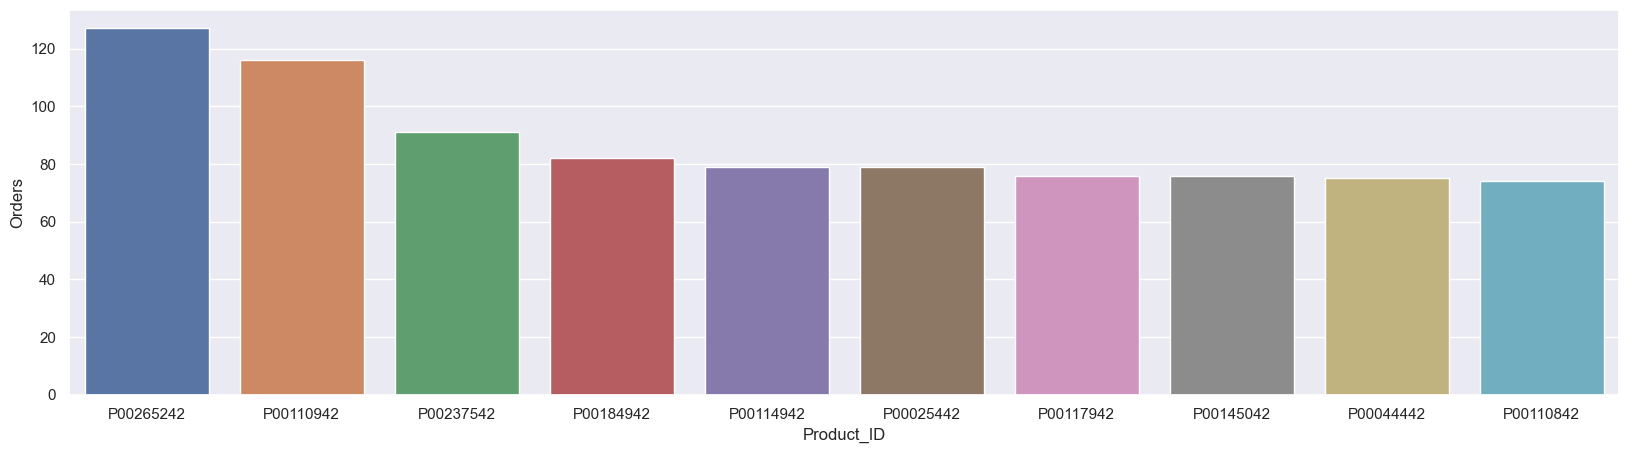

In [27]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

## Conclusion:

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*

# Created By : Ahsanul Kyum Siam